In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

+ PassengerID: Unique identifier for each passenger.
+ Pclass: Passenger class (1st, 2nd, 3rd).
+ Name: Full name of the passenger.
+ Sex: Gender of the passenger.
+ Age: Age of the passenger.
+ SibSp: Number of siblings/spouses aboard.
+ Parch: Number of parents/children aboard.
+ Ticket: Ticket number.
+ Fare: Ticket fare.
+ Cabin: Cabin number.
+ Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
+ Survived: Survival status (0 = No; 1 = Yes).

In [217]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [218]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
train_df.shape

(891, 12)

In [220]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [223]:
train_df.duplicated().sum()

0

In [224]:
test_df.duplicated().sum()

0

In [225]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [226]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [227]:
train_df.drop('Cabin', axis=1, inplace = True)
test_df.drop('Cabin' ,axis=1, inplace=True)

In [228]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [229]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [230]:
all_data=[train_df,test_df]

In [231]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [232]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [233]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])

In [234]:
for dataset in all_data:
    drop_column = ['PassengerId', 'Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [235]:
train_df = pd.get_dummies(train_df, columns = ["Sex","Age_bin","Embarked","Fare_bin"])

In [236]:
train_df

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,0,3,1,0,2,False,True,False,False,True,False,False,False,True,True,False,False,False
1,1,1,1,0,2,True,False,False,False,True,False,True,False,False,False,False,False,True
2,1,3,0,0,1,True,False,False,False,True,False,False,False,True,False,True,False,False
3,1,1,1,0,2,True,False,False,False,True,False,False,False,True,False,False,False,True
4,0,3,0,0,1,False,True,False,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,False,True,False,False,True,False,False,False,True,False,True,False,False
887,1,1,0,0,1,True,False,False,True,False,False,False,False,True,False,False,True,False
888,0,3,1,2,4,True,False,False,False,True,False,False,False,True,False,False,True,False
889,1,1,0,0,1,False,True,False,False,True,False,True,False,False,False,False,True,False


In [238]:
test_df = pd.get_dummies(test_df, columns = ["Sex","Age_bin","Embarked","Fare_bin"])
test_df

,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,3,0,0,1,False,True,False,False,True,False,False,True,False,True,False,False,False
1,3,1,0,2,True,False,False,False,False,True,False,False,True,True,False,False,False
2,2,0,0,1,False,True,False,False,False,True,False,True,False,False,True,False,False
3,3,0,0,1,False,True,False,False,True,False,False,False,True,False,True,False,False
4,3,1,1,3,True,False,False,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,False,True,False,False,True,False,False,False,True,False,True,False,False
414,1,0,0,1,True,False,False,False,True,False,True,False,False,False,False,False,True
415,3,0,0,1,False,True,False,False,True,False,False,False,True,True,False,False,False
416,3,0,0,1,False,True,False,False,True,False,False,False,True,False,True,False,False


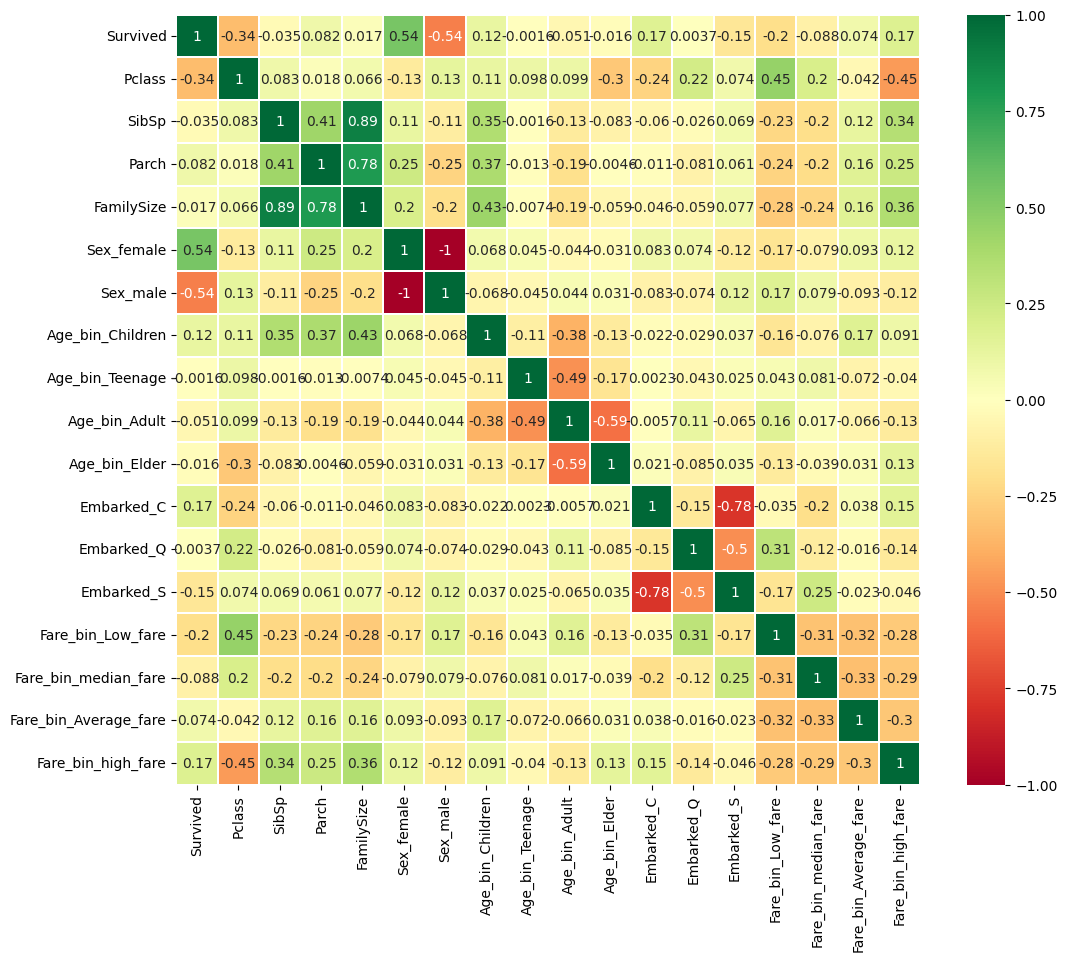

In [242]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [257]:
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 17), (268, 17), (623,), (268,))

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
model = LogisticRegression(max_iter=200)

In [262]:
model

LogisticRegression(max_iter=200)

In [263]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [264]:
model.coef_

array([[-8.66375352e-01, -1.81731936e-01,  9.78925012e-04,
        -1.99533374e-01,  1.32162059e+00, -1.34040095e+00,
         1.49064838e+00, -4.54561113e-01, -3.32097443e-01,
        -7.22770184e-01,  2.58255195e-01,  1.07887545e-01,
        -3.84923104e-01, -1.94265613e-02,  2.45385135e-01,
         2.28036093e-01,  4.21071894e-01]])

In [265]:
model.intercept_

array([2.51187755])

In [266]:
y_pred = model.predict(X_test)

In [267]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [269]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Confusion Matrix:
[[133  24]
 [ 28  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.78      0.75      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

In [272]:
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

In [273]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [274]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_:.2f}')

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.80


In [275]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [276]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.81
